In [226]:
import pandas as pd
from ipywidgets import interact, widgets
import plotly.express as px
from IPython.display import display
import warnings
import folium
import csv
import math
import matplotlib.cm as cm
import matplotlib.colors as colors

In [227]:
# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

# Drop '_id' column
df.drop('_id', axis=1, inplace=True, errors='ignore')

# Create a copy of the DataFrame with datetime 'Date' column
df_dates = df.copy()

# Define function to plot entries per month
def plot_entries_per_month(fill_type):
    if fill_type == 'All Fill Types':
        filtered_df = df_dates.copy()  
    else:
        filtered_df = df_dates[df_dates['Fill Type'] == fill_type].copy()  

    # Ensure datetime column has timezone information
    filtered_df['Date'] = filtered_df['Date'].dt.tz_localize(None)  # Remove any existing timezone information

    # Convert 'Date' column to Periods
    filtered_df.loc[:, 'YearMonth'] = filtered_df['Date'].dt.to_period('M').dt.strftime('%B')  

    monthly_counts = filtered_df.groupby('YearMonth').size().reset_index(name='Total Entries')

    # Sort monthly_counts by 'YearMonth'
    monthly_counts['YearMonth'] = pd.Categorical(monthly_counts['YearMonth'], 
                                                 categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                             'July', 'August', 'September', 'October', 'November', 'December'], 
                                                 ordered=True)
    monthly_counts = monthly_counts.sort_values('YearMonth')

    # Set figure size
    fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', 
                 labels={'YearMonth': 'Month', 'Total Entries': 'Total Entries'},
                 title=f'Total Fills per Month for {fill_type} in 2023')

    fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                      width=800, height=500) 
    fig.show()

# Get unique values of 'Fill Type' for dropdown menu excluding 'nan'
fill_types = df_dates['Fill Type'].dropna().unique()
fill_types = list(fill_types)
fill_types.append('All Fill Types')  

# Create interactive dropdown menu
interact(plot_entries_per_month, fill_type=widgets.Dropdown(options=fill_types, description='Fill Type:'))


interactive(children=(Dropdown(description='Fill Type:', options=('Rescued Groceries', 'Purchased Groceries', …

<function __main__.plot_entries_per_month(fill_type)>

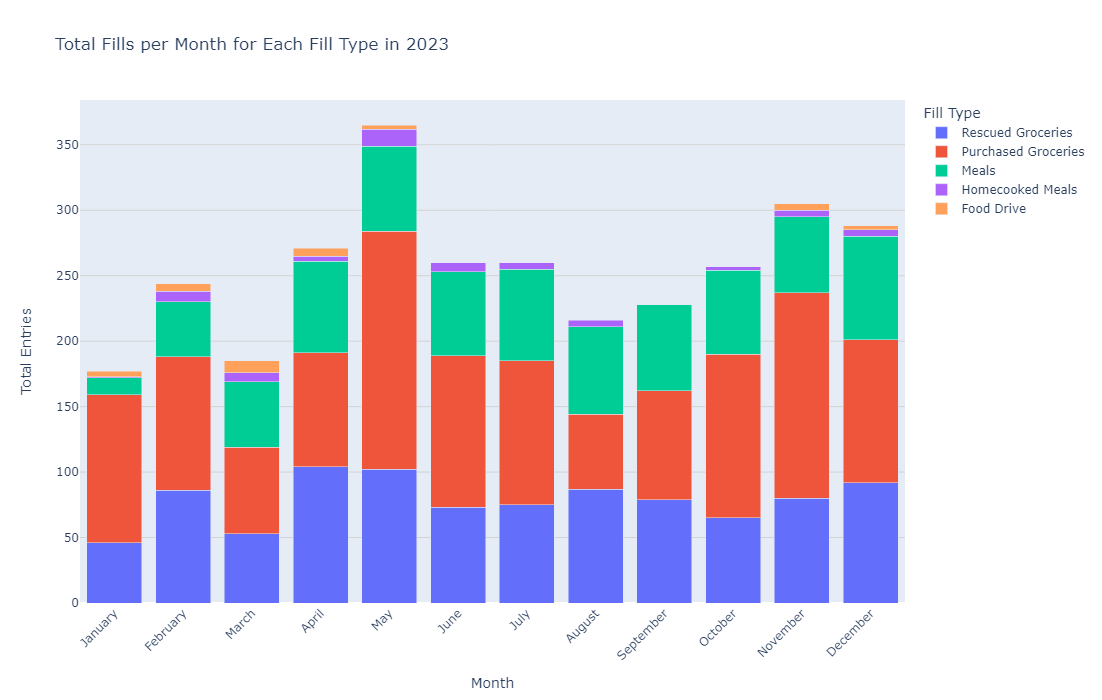

In [228]:
# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

# Drop '_id' column
df.drop('_id', axis=1, inplace=True, errors='ignore')

# Create a copy of the DataFrame with datetime 'Date' column
df_dates = df.copy()

# Ensure datetime column has timezone information
df_dates['Date'] = df_dates['Date'].dt.tz_localize(None)  # Remove any existing timezone information

# Convert 'Date' column to Periods
df_dates.loc[:, 'YearMonth'] = df_dates['Date'].dt.to_period('M').dt.strftime('%B')  

# Group by 'YearMonth' and 'Fill Type' to count entries for each combination
monthly_counts = df_dates.groupby(['YearMonth', 'Fill Type']).size().reset_index(name='Total Entries')

# Sort 'YearMonth' by month order
monthly_counts['YearMonth'] = pd.Categorical(monthly_counts['YearMonth'], 
                                             categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                         'July', 'August', 'September', 'October', 'November', 'December'], 
                                             ordered=True)
monthly_counts = monthly_counts.sort_values('YearMonth')

# Set figure size
fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', 
             color='Fill Type', 
             labels={'YearMonth': 'Month', 'Total Entries': 'Total Entries', 'Fill Type': 'Fill Type'},
             title='Total Fills per Month for Each Fill Type in 2023',
             barmode='stack')

fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                  width=1100, height=700) 

# Display the graph
display(fig)


In [251]:
# Convert the "Date" column to datetime objects
df_dates['Date'] = pd.to_datetime(df_dates['Date'])

def plot_donations_by_month(month):
    # Static year value
    year = 2023
    
    # Filter the DataFrame for the selected month and year
    monthly_data = df_dates.loc[(df_dates['Date'].dt.year == year) & (df_dates['Date'].dt.month == month)]
    
    # Group the data by date and time of day and count the number of donations for each group
    monthly_donations = monthly_data.groupby(['Date', 'Time of Day']).size().unstack(fill_value=0)
    
    # Reset index to ensure 'Date' is a column for Plotly
    monthly_donations = monthly_donations.reset_index()
    
    # Plot the data
    fig = px.line(monthly_donations, x='Date', y=monthly_donations.columns[1:], 
                  title=f'Donations by Time of Day in {month}/2023', 
                  labels={'Date': 'Date', 'value': 'Number of Donations', 'variable': 'Time of Day'})
    fig.update_xaxes(tickangle=45)
    fig.show()

# Define the options for the dropdown menu
months = range(1, 13)  # January to December

# Create interactive dropdown menu for month
interact(plot_donations_by_month, month=months)


interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

<function __main__.plot_donations_by_month(month)>

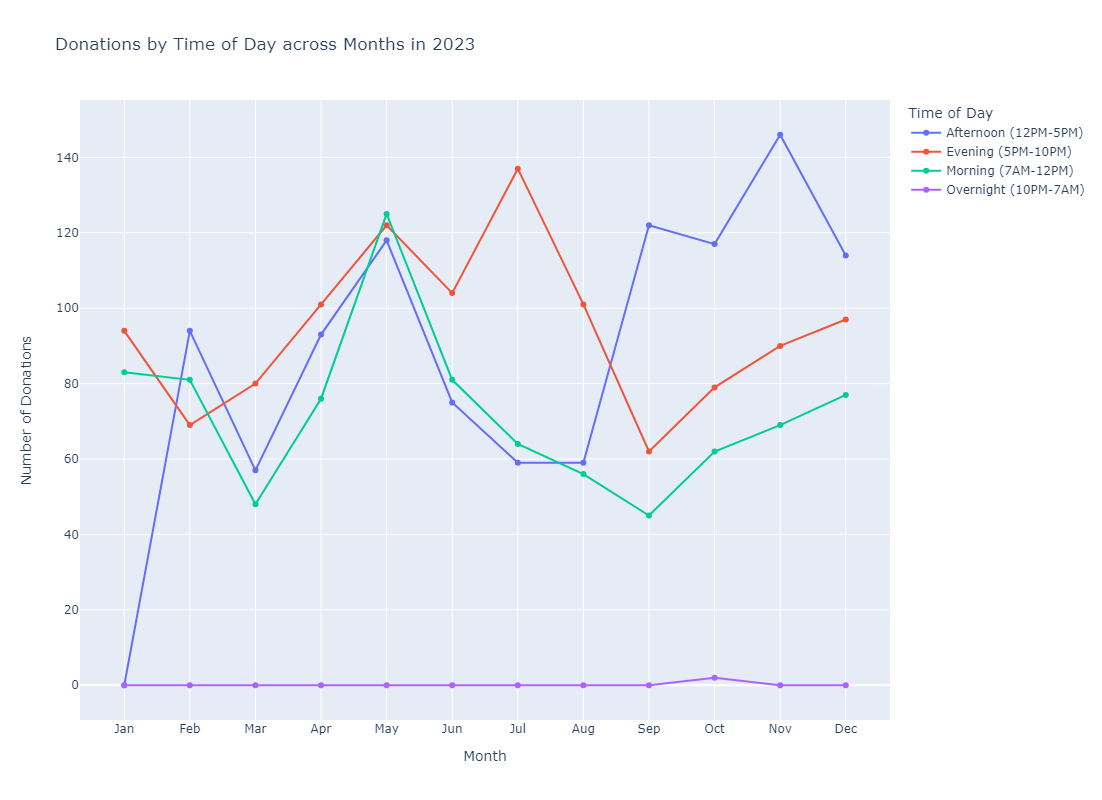

In [255]:
import plotly.graph_objects as go

# Convert the "Date" column to datetime objects
df_dates['Date'] = pd.to_datetime(df_dates['Date'])

# Group the data by month and time of day and count the number of donations for each group
monthly_donations = df_dates.groupby([df_dates['Date'].dt.month, 'Time of Day']).size().unstack(fill_value=0)

# Plot the data
fig = go.Figure()

# Add traces for each time of day
for time_of_day in monthly_donations.columns:
    fig.add_trace(go.Scatter(x=monthly_donations.index, y=monthly_donations[time_of_day], mode='lines+markers', name=time_of_day))

# Update layout
fig.update_layout(
    title='Donations by Time of Day across Months in 2023',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Donations'
    ),
    legend=dict(
        title='Time of Day'
    ),
    hovermode='closest',
    height=800  
)

# Show plot
fig.show()


In [229]:
# Load data
df = pd.read_csv("fridgefills.csv")


mapped_data = []
for index, row in df.iterrows():
    dropoff_location = row["Dropoff Location"]
    renamed_location, dropoff_address = map_dropoff_location(dropoff_location)
    if renamed_location is not None:  # Only append if location is recognized
        row["Dropoff Location"] = renamed_location
        row["Dropoff Address"] = dropoff_address
        mapped_data.append(row)

# Create a new DataFrame with the mapped data
clean_df = pd.DataFrame(mapped_data)

# Drop rows with NaN values
clean_df = clean_df.dropna()

# Strip additional information from the "Dropoff Location" column
clean_df["Dropoff Location"] = clean_df["Dropoff Location"].apply(normalize_location)

# Save clean dataset to CSV
clean_df.to_csv("clean_dataset.csv", index=False)


In [230]:
# Load clean dataset
clean_df = pd.read_csv("clean_dataset.csv")

# Dictionary mapping normalized locations to their coordinates [latitude, longitude]
locations = {
    "BOK FRIDGE & PANTRY": [39.9257126, -75.1656558],
    "DISILVESTRO PLAYGROUND FRIDGE & PANTRY": [39.9288762, -75.1730298],
    "MIFFLIN SQUARE PARK PANTRY": [39.9194993, -75.1591811],
    "CLEVELAND": [39.9316784, -75.1802706],
    "POINT BREEZE": [39.9375953, -75.1811959,],
    "PEOPLE’S KITCHEN FRIDGE & PANTRY": [39.934939, -75.163433],
    "PORCO’S PHILLY PANTRY": [39.9392245, -75.1830078],
    "GROWING TOGETHER GARDEN PANTRY": [39.9345248, -75.1898937],
    "LUHV FRIDGE": [39.9378609, -75.1775544]
}


# Function to update latitude and longitude columns based on the locations dictionary
def update_coordinates(row):
    location = row["Dropoff Location"]
    if location in locations:
        latitude, longitude = locations[location]
        row["Latitude"] = latitude
        row["Longitude"] = longitude
    return row

# Apply the update_coordinates function to each row in the DataFrame
clean_df = clean_df.apply(update_coordinates, axis=1)

# Save the updated DataFrame to CSV
clean_df.to_csv("updated_clean_dataset.csv", index=False)



In [231]:
# Group the data by "Dropoff Location" and count the occurrences
fridge_fills_count = df.groupby('Dropoff Location').size().reset_index(name='Fridge Fills')

# Normalize "Dropoff Location" column in both DataFrames
fridge_fills_count['Dropoff Location'] = fridge_fills_count['Dropoff Location'].apply(normalize_location)
clean_df['Dropoff Location'] = clean_df['Dropoff Location'].apply(normalize_location)

# Merge the counts with the clean_df DataFrame based on the "Dropoff Location" column
fridge_fills_count = fridge_fills_count.merge(clean_df[['Dropoff Location', 'Latitude', 'Longitude']], 
                                              how='left', on='Dropoff Location')

# Drop duplicate rows if any
fridge_fills_count = fridge_fills_count.drop_duplicates()

# Display the first few rows



In [232]:
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.tab10  # Example colormap
    
    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))
    
        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2
    
        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 200px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    m.save('choropleth_map.html')

# Call the function to create the choropleth map
create_choropleth_map('updated_clean_dataset.csv')


In [225]:
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.get_cmap('tab10', len(donation_counts))

    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))

        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2

        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 250px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    html_map_path = 'choropleth_map.html'
    m.save(html_map_path)
    
    # Return the path to the HTML file
    return html_map_path

# Call the function to create the choropleth map
html_map_path = create_choropleth_map('updated_clean_dataset.csv')

# Display the map in the notebook
IFrame(html_map_path, width='100%', height=500)


C:\Users\vjmar\AppData\Local\Temp\ipykernel_10648\139316641.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

